### **Topic Modeling : 문서를 이루는 핵심어를 바탕으로 문서에서 주제를 추출해주는 확률모델 알고리즘** <br>
### **LDA (Latent Dirichlet Allocation) : 단어가 어느 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합확률로 추정하여 토픽을 추출하는 방식**

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
import re
import networkx as nx

In [ ]:
import pandas as pd
df = pd.read_csv('/content/미모열일긍정.csv', encoding='cp949')

df.head(10)

,Unnamed: 0,review
0,0,엘프 요정이랑 같이 구매 했습니다
1,1,처음 구매 하려고 온라인 몰을 살펴 볼 때부터도 엘프 요정이 미모 열일보다 더 예뻐...
2,2,엘프 요정은 단독으로 발라도 너무 예쁩니다
3,3,근데 미모 열일은 단독으로 바르기에는 좀 아쉽고 엘프 요정을 기본 베이스로 바르고 ...
4,4,무엇보다 페리페라 틴트는 용기도 너무 귀엽고 휴대하기 용이 하다고 생각합니다
5,5,그래서 평소 이 2개 색상을 들고 다니면서 지워지면 바르는 편입니다ㅎㅎ
6,6,밥을 먹어도 커피를 마셔도 찐하게 잘 남아 있어요ㅎㅎ
7,7,립에 얹으니 엄청 형광 느낌도 없고 딱 브라이트톤에 어울릴만한 핑크톤 틴트더라구요
8,8,페리페라의 넘넘 체리한데 청량 넣어줄 수 있어 팔레트와 같이 사용하면 여쿨메이크업 ...
9,9,제품 텍스쳐도 너무 매트하지 않으면서도 보송하게 밀착돼서 너무 만족해요


In [ ]:
from konlpy.tag import Mecab
tagger = Mecab()

In [ ]:
stopwords =['미모','열일','색','사용', '색상', '단독', '구매', '제품','페리페라','틴트','컬러','페리','페라','립','것','거','여','저']

In [ ]:
# stopwords 제외한 명사 추출
galexy_nouns = []
nouns = []
for post in df['review']:
    for noun in tagger.nouns(post):
        if noun not in stopwords:
            nouns.append(noun)
    galexy_nouns.append(nouns)

In [ ]:
!pip install gensim

명사에 대해 bigram 형태로 만들어 사용한다. 그리고  bigram으로 묶인 명사에 대해서 trigram을 만들어 사용한다. https://wikidocs.net/21692

In [ ]:
import gensim
galexy_bigram = gensim.models.Phrases(galexy_nouns)
galexy_trigram = gensim.models.Phrases(galexy_bigram[galexy_nouns])
galexy_bigram_model = gensim.models.phrases.Phraser(galexy_bigram)
galexy_trigram_model = gensim.models.phrases.Phraser(galexy_trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
from gensim import corpora
galexy_bigram_document = [galexy_bigram_model[nouns] for nouns in galexy_nouns]
galexy_bigram_document[1]

['엘프',
 '요정',
 '처음',
 '온라인',
 '몰',
 '때',
 '엘프',
 '요정',
 '열',
 '일',
 '예상',
 '기대',
 '엘프',
 '요정',
 '엘프',
 '요정',
 '엘프',
 '요정',
 '기본',
 '베이스',
 '위',
 '열',
 '일',
 '포인트',
 '무엇',
 '용기',
 '휴대',
 '용',
 '생각',
 '평소',
 '개',
 '편',
 '밥',
 '커피',
 '형광',
 '느낌',
 '브라이트',
 '톤',
 '만',
 '핑크',
 '톤',
 '체리',
 '청량',
 '수',
 '팔레트',
 '쿨',
 '메이크업',
 '텍',
 '매트',
 '밀착',
 '만족',
 '웜',
 '톤',
 '존',
 '예',
 '탱',
 '핑크',
 '피부',
 '타입',
 '웜',
 '톤',
 '톤',
 '생각',
 '편',
 '잉크',
 '벨벳',
 '에어리',
 '벨벳',
 '수집',
 '보유',
 '중',
 '톤',
 '문제',
 '핑크',
 '줄',
 '코랄',
 '끼',
 '전형',
 '쿨톤',
 '그러데이션',
 '풀',
 '입술',
 '게',
 '열',
 '일',
 '칭찬',
 '호',
 '엘프',
 '요정',
 '조합',
 '여름',
 '라이트',
 '톤',
 '쿨',
 '톤',
 '예전',
 '처음',
 '출시',
 '열',
 '일',
 '출시',
 '중',
 '제',
 '퍼스널',
 '여름',
 '뮤',
 '트',
 '톤',
 '쿨톤',
 '손등',
 '샤워',
 '만족',
 '무엇',
 '마스크',
 '게',
 '용도',
 '베이스',
 '단계',
 '음영',
 '때',
 '이것',
 '부담',
 '느낌',
 '블러',
 '셔',
 '포인트',
 '착색',
 '블',
 '렌',
 '딩',
 '발림',
 '에어리',
 '벨벳',
 '이름',
 '에어리',
 '대박',
 '내',
 '돈',
 '내산',
 '열',
 '일',
 '쿨',
 '집중',
 '제',
 '애정',
 '브랜드',
 '중',
 '하나',
 '

bigram 문서에 대해 id와 word로 매핑된 딕셔너리 생성. <br>
doc2bow 함수를 통해 (단어,빈도수)형태로 변환.

In [ ]:
galexy_id2word = corpora.Dictionary(galexy_bigram_document)
galexy_corpus = [galexy_id2word.doc2bow(doc) for doc in galexy_bigram_document]
galexy_corpus[0]


[(0, 1),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 22),
 (5, 1),
 (6, 4),
 (7, 9),
 (8, 3),
 (9, 2),
 (10, 2),
 (11, 8),
 (12, 1),
 (13, 22),
 (14, 2),
 (15, 1),
 (16, 4),
 (17, 3),
 (18, 2),
 (19, 1),
 (20, 1),
 (21, 11),
 (22, 24),
 (23, 1),
 (24, 1),
 (25, 5),
 (26, 2),
 (27, 1),
 (28, 2),
 (29, 1),
 (30, 9),
 (31, 12),
 (32, 1),
 (33, 3),
 (34, 14),
 (35, 1),
 (36, 12),
 (37, 1),
 (38, 26),
 (39, 1),
 (40, 2),
 (41, 8),
 (42, 25),
 (43, 1),
 (44, 1),
 (45, 2),
 (46, 1),
 (47, 1),
 (48, 9),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 8),
 (55, 3),
 (56, 1),
 (57, 2),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 2),
 (62, 2),
 (63, 1),
 (64, 2),
 (65, 1),
 (66, 1),
 (67, 3),
 (68, 2),
 (69, 1),
 (70, 2),
 (71, 1),
 (72, 4),
 (73, 8),
 (74, 2),
 (75, 1),
 (76, 9),
 (77, 1),
 (78, 1),
 (79, 2),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 3),
 (84, 1),
 (85, 1),
 (86, 2),
 (87, 4),
 (88, 2),
 (89, 6),
 (90, 1),
 (91, 1),
 (92, 2),
 (93, 1),
 (94, 1),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 2),
 (99, 2),
 

### Topic Coherence 계산 <br>
적절한 토픽 개수 정하기. 2부터 9까지 값을 늘려가면서 LDA모델을 생성하여 각 모델의 coherence를 계산.<br> 적절한 토픽의 수는 토픽 개수를 늘려가며 높은 coherence score를 가지는 값으로 결정

In [ ]:
from gensim.models import CoherenceModel

galexy_coherence_score=[]
for i in range(2,10):
    model = gensim.models.ldamodel.LdaModel(corpus=galexy_corpus, id2word=galexy_id2word, num_topics=i)
    coherence_model = CoherenceModel(model, texts=galexy_bigram_document, dictionary=galexy_id2word, coherence='c_v')
    coherence_lda = coherence_model.get_coherence()
    print('n=',i,'\nCoherence Score: ', coherence_lda)
    galexy_coherence_score.append(coherence_lda)

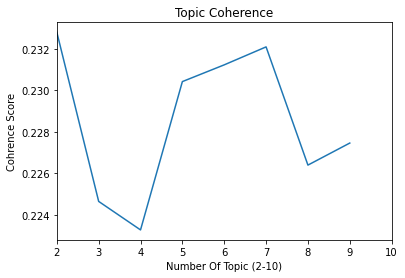

In [ ]:
import matplotlib.pyplot as plt
import numpy

k=[]
for i in range(2,10):
    k.append(i)

x=numpy.array(k)
y=numpy.array(galexy_coherence_score)
plt.title('Topic Coherence')
plt.plot(x,y)
plt.xlim(2,10)
plt.xlabel('Number Of Topic (2-10)')
plt.ylabel('Cohrence Score')
plt.show()

토픽의 개수가 증가할수록 coherence score가 증가하는 추이를 보인다.(???) 가장 높은 값을 가지다가 낮아지기 시작하는 지점이 적절한 토픽개수로 판단하고, lda모델을 생성

In [ ]:
galexy_model = gensim.models.ldamodel.LdaModel(corpus=galexy_corpus, id2word=galexy_id2word, num_topics=7)
galexy_model.print_topics()
# LDA에서 토픽의 내용이 무엇인지는 사용자가 주관적으로 판단.. 
# 숫자는 각각의 단어가 그 토픽을 반영하는 비율
# 결과창 밑으로 쭉 내려야돼요

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=da5a759b0d437e1a64cb69e23414ddaa34c437f211aa6d99392e5f8ff5bc914e
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


토픽 간 거리지도 시각화

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
prepared_data = gensimvis.prepare(galexy_model, galexy_corpus, galexy_id2word)
pyLDAvis.display(prepared_data)
# 왼쪽 : 다차원척도. 토픽 간 거리가 가까울 수록 비슷한 경향

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
